# Supplementary Figures

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import glob
import pandas as pd

# Plotting (set font)
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
import matplotlib.pyplot as plt

import salt
import pe
import plot

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

from bokeh.io import output_notebook
from bokeh.plotting import show

from importlib import reload
reload(salt)
reload(pe)

output_notebook()


# USER PARAMETERS
save_folder = '../PAPERS/ccls/figs/'
Z = 1 # charge per monomer (same for polyanion and polycation)
# range of temperatures considered (liquid water) [K]
T_range = [273, 373]
# list of salt [KBr] concentrations [mol/L]
rho_s_list = [1.75, 2.0, 2.05]
# list of polyanion [PSS] concentrations [mol/L]
rho_p_list = [0.15, 0.3]
# accurate choice for sigma based on Bjerrum length of water (see Zhang et al. 2016)
sigma = 4.3E-10 # [m]
# degree of polymerization
N = 100
# conversion of meters to Angstroms [A]
m_2_A = 1E10
# conversion from beads/sigma^3 to mol/L (M)
beads_2_M = pe.get_beads_2_M(sigma*m_2_A)

K_2_C = 273.15

Loading BokehJS ...

## S1: Bjerrum Length vs. Temperature

Could not walk through files in salt/no_vdw\NA(100)NB(100)lB(2.073)
Loading data for lB = 1.785 failed.
Loading data for lB = 1.785 failed.
Loading data for lB = 2.073 failed.
Loading data for lB = 3.150 failed.
Loading data for lB = 3.200 failed.
Loading data for lB = 3.250 failed.


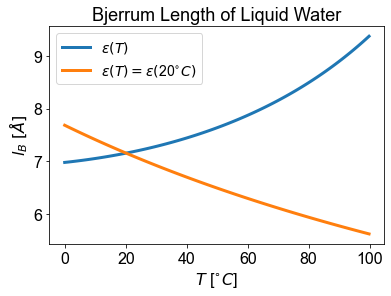

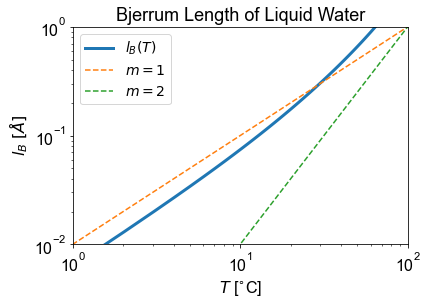

In [23]:
data_folder = 'salt/no_vdw/'
data = salt.load_data(data_folder)

T_cels = True

# plot parameters
ax_fs = 16
t_fs = 18
tk_fs = 16
l_fs = 14


# Computes Bjerrum length in desired temperature range
T_arr = np.linspace(273, 373, 100)
lB_arr = pe.lB_fn(T_arr, sigma=sigma) # in units of sigma
lB_A_arr = lB_arr*sigma*m_2_A # converts to A
# computes Bjerrum length near room temperature
T_room_C = 20 # room temperature [C]
T_room = T_room_C + 273.15 # converts from Celsius to Kelvin
i_room = np.argmin(np.abs(T_arr - T_room))
lB_room = lB_arr[i_room]
lB_0_arr = lB_room*T_room/T_arr # in units of sigma
lB_0_A_arr = lB_0_arr*sigma*m_2_A # converts to A

# plots Bjerrum length vs. Temperature
fig = plt.figure()
ax = fig.add_subplot(111)

if T_cels:
    T_arr -= K_2_C
    unit_T = r'$^{\circ}C$'
else:
    unit_T = 'K'
    
ax.plot(T_arr, lB_A_arr, lw=3, label=r'$\epsilon(T)$')
ax.plot(T_arr, lB_0_A_arr, lw=3, label=r'$\epsilon(T) = \epsilon($' + '{0:d}'.format(int(T_room_C)) + r'$^{\circ}C)$')

# formats plot

ax.set_xlabel(r'$T$ [' + unit_T + ']', fontsize=ax_fs)
ax.set_ylabel(r'$l_B$ $[\AA]$', fontsize=ax_fs)
ax.set_title('Bjerrum Length of Liquid Water', fontsize=t_fs)
ax.tick_params(axis='both', labelsize=tk_fs)
plt.legend(fontsize=l_fs)


##########################################################################################
# LOG SCALE

# plots Bjerrum Length vs. Temperature
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(T_arr - T_arr[0], lB_A_arr - lB_A_arr[0], lw=3, label=r'$l_B(T)$')

# slope of 1
x = np.linspace(0, 100, 1000)
y = x/1E2
ax.plot(x, y, '--', label=r'$m=1$')

# slope of 2
y = x**2/1E4
ax.plot(x, y, '--', label=r'$m=2$')


# formats plot
ax.set_xlabel(r'$T$ [$^{\circ}$C]', fontsize=ax_fs)
ax.set_ylabel(r'$l_B$ $[\AA]$', fontsize=ax_fs)
ax.set_title('Bjerrum Length of Liquid Water', fontsize=t_fs)
ax.tick_params(axis='both', labelsize=tk_fs)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1, 100])
ax.set_ylim([0.01, 1])
plt.legend(fontsize=l_fs)

## S2: Phase Diagram of VO Theory -- Ask Chris for more data

**Note**: First reformat data produced by `Wetting-Polymer-Films` package into the format produced by Pengfei's `ccls` package using the `reformat_vo_chris.ipynb` Jupyter notebook (run the cell).

In [26]:
### DATA PARAMETERS ###
# folder with binodal data
data_folder = 'vo/vo_chris/' # must contain mu in .PD file
save_name = 'si_lcst_fixed_salt_conc_vo.pdf' 
# extension for data file, including period
ext = '.PD'
# concentration of salt in reservoir [mol/L]
rho_salt_M = 5.5
# converts to beads/sigma^3
rho_salt = rho_salt_M/beads_2_M
# folder with chemical potential calculations for salt solution
mu_salt_folder = data_folder
### FORMATTING PARAMETERS ###
# number of points to have in plot
n_pts = 50000
# parameter to plot for z axis
z_name = 'T [C]'
# binodal at fixed temperature
z_rough = 10
# range of Bjerrum lengths to plot
lB_lo = 1.0
lB_hi = 1.975
# values at which to outline binodal surface
T_for_outline = [0, 80]
rho_s_for_outline = []

In [9]:
# loads data
data = salt.load_data(data_folder, ext=ext,
                lB_lo=lB_lo, lB_hi=lB_hi, num_rows_hdr=0)

In [27]:
data_3d, data_mu, data_z, data_cp, data_outlines = salt.data_fig1(data, mu_salt_folder, rho_salt, T_range, 
                                                    sigma, z_name, beads_2_M, n_pts, z_rough, ext=ext, 
                                                   num_rows_hdr=0, lB_lo=lB_lo, lB_hi=lB_hi, quiet=True,
                                                                T_for_outline=T_for_outline,
                                                      rho_s_for_outline=rho_s_for_outline)

rhoAI = 0.263 outside of range for Bjerrum length = 1.000.
rhoAI = 0.263 outside of range for Bjerrum length = 1.005.
rhoAI = 0.263 outside of range for Bjerrum length = 1.010.
rhoAI = 0.263 outside of range for Bjerrum length = 1.015.
rhoAI = 0.263 outside of range for Bjerrum length = 1.020.
rhoAI = 0.263 outside of range for Bjerrum length = 1.025.
rhoAI = 0.263 outside of range for Bjerrum length = 1.030.
rhoAI = 0.263 outside of range for Bjerrum length = 1.035.
rhoAI = 0.263 outside of range for Bjerrum length = 1.040.
rhoAI = 0.263 outside of range for Bjerrum length = 1.045.
rhoAI = 0.263 outside of range for Bjerrum length = 1.050.
rhoAI = 0.263 outside of range for Bjerrum length = 1.055.
rhoAI = 0.263 outside of range for Bjerrum length = 1.060.
rhoAI = 0.263 outside of range for Bjerrum length = 1.065.
rhoAI = 0.263 outside of range for Bjerrum length = 1.070.
rhoAI = 0.263 outside of range for Bjerrum length = 1.075.
rhoAI = 0.263 outside of range for Bjerrum length = 1.08

rhoAI = 0.263 outside of range for Bjerrum length = 1.055.
rhoAI = 0.263 outside of range for Bjerrum length = 1.060.
rhoAI = 0.263 outside of range for Bjerrum length = 1.065.
rhoAI = 0.263 outside of range for Bjerrum length = 1.070.
rhoAI = 0.263 outside of range for Bjerrum length = 1.075.
rhoAI = 0.263 outside of range for Bjerrum length = 1.080.
rhoAI = 0.263 outside of range for Bjerrum length = 1.085.
rhoAI = 0.263 outside of range for Bjerrum length = 1.090.
rhoAI = 0.263 outside of range for Bjerrum length = 1.095.
rhoAI = 0.263 outside of range for Bjerrum length = 1.100.
rhoAI = 0.263 outside of range for Bjerrum length = 1.105.
rhoAI = 0.263 outside of range for Bjerrum length = 1.110.
rhoAI = 0.263 outside of range for Bjerrum length = 1.115.
rhoAI = 0.263 outside of range for Bjerrum length = 1.120.
rhoAI = 0.263 outside of range for Bjerrum length = 1.125.
rhoAI = 0.263 outside of range for Bjerrum length = 1.130.
rhoAI = 0.263 outside of range for Bjerrum length = 1.13

In [30]:
reload(plot)
################### PLOT PARAMETERS ###################################
# parameters
fs = 14 # tick label font size
op = 0.03
ms_bin = 20
lw_bin = 30
lw_fix = 45
lw_crit = 30
lw_outline = 6
# colors
c1_T = 'blue'
c2_T = 'red'
c1_fix = 'blue'
c2_fix = 'red'
c_crit = 'black'
c_outline = '#1A2D4A'
mode = 'markers'
# figure size
width = 6000 # pixels
height = 5000 # pixels
# coordinates of camera eye
eye_xyz = (1.5, 1.5, 1.5) #(0.6, -1.8, 1.2)
# offset of axes from true 0 (so they are not hidden by planes in background)
offset = 0.003

x_range = [-0.2, 20]
y_range = [-0.1, 8]
z_range = [0, 82]

plot_params = (x_range, y_range, z_range, eye_xyz, op, ms_bin, lw_bin, 
    lw_fix, lw_crit, lw_outline, c1_T, c2_T, c1_fix, c2_fix, 
    c_crit, c_outline, mode, width, height, fs, offset)

############### PLOTTING ########################
fig = plot.fig1(data_3d, data_cp, data_z, data_mu, 
                plot_params, data_outlines=data_outlines)


# shows figure
# fig.show()

# saves figure
pio.write_image(fig, save_folder + save_name, width=width, height=height)

### VO Theory in Polymer-salt Plane

Goal is to see that the binodal widens with temperature

In [22]:
# loads data
data_folder = 'vo/vo_chris/'
data = salt.load_data(data_folder, num_rows_hdr=0)

lB = 1.625 gives 1 phase for rho_p = 1.000 [mol/L],rho_s = 6.000 [mol/L].
lB = 1.780 gives 1 phase for rho_p = 1.000 [mol/L],rho_s = 6.000 [mol/L].
lB = 1.625 gives 1 phase for rho_p = 8.000 [mol/L],rho_s = 4.000 [mol/L].
lB = 1.625 gives 1 phase for rho_p = 10.000 [mol/L],rho_s = 4.000 [mol/L].
lB = 1.780 gives 1 phase for rho_p = 8.000 [mol/L],rho_s = 4.000 [mol/L].
lB = 1.780 gives 1 phase for rho_p = 10.000 [mol/L],rho_s = 4.000 [mol/L].
lB = 2.065 gives 1 phase for rho_p = 10.000 [mol/L],rho_s = 4.000 [mol/L].


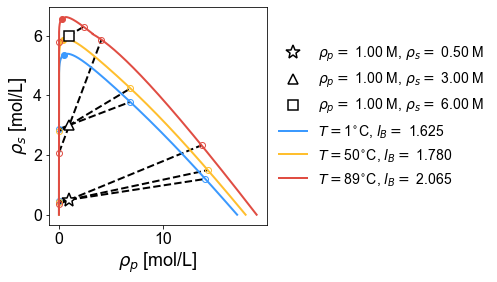

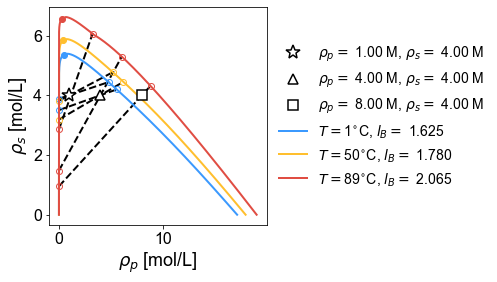

In [24]:
# Parameters
colors = ['#3B99FE', '#FFBF2E', '#E04D43'] # blue, yellow, red
# list of salt [KBr] concentrations [mol/L]
rho_s_list = [0.5, 3.0, 6.0]
# list of polyanion [PSS] concentrations [mol/L]
rho_p_list = [1.0, 4.0, 8.0, 10.0]
# Temperature in Celsius?
T_cels = True
# square plot box?
square_box = True

################ VARIES SALT CONCENTRATION ###############

# list of Bjerrum lengths to plot
lB_list = [1.625, 1.78, 2.065]

# fixed overall concentration of polymer
rho_p = 1 # [M]

# plots binodal
ax = plot.binodal_rho_rho(data, lB_list, rho_s_list, rho_p, 's', beads_2_M, 
                          sigma=sigma, colors=colors, T_cels=T_cels, title='', square_box=square_box)
_ = plot.sort_lgnd_labels(ax, ['M', '$T'])

############ VARIES POLYMER CONCENTRATION ####################

# list of Bjerrum lengths to plot
lB_list = [1.625, 1.78, 2.065]

# fixed overall salt concentration
rho_s  = 4.0 # [M]

# plots binodal
ax = plot.binodal_rho_rho(data, lB_list, rho_p_list, rho_s, 'p', beads_2_M, 
                          sigma=sigma, colors=colors, T_cels=T_cels, title='', square_box=square_box)
_ = plot.sort_lgnd_labels(ax, ['M', '$T'])

## Vary N

Below we show the effect of the molecular weight on the binodal in the salt-temperature plane.

In [2]:
data_folder = 'salt/vary_params/'
mu_salt_folder = 'salt/mu_salt_1000/'
rho_s_M = 1.7
N_list = [100, 200, 400, 1000]
sigma = 4.3E-10 # [m]
ext = 'output.dat'
T_cels = True

data_vary_N = salt.binodal_vary_N_data(data_folder, mu_salt_folder, rho_s_M, N_list,
                        T_cels=T_cels, sigma=sigma, ext=ext, T_range=[270, 376])

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.



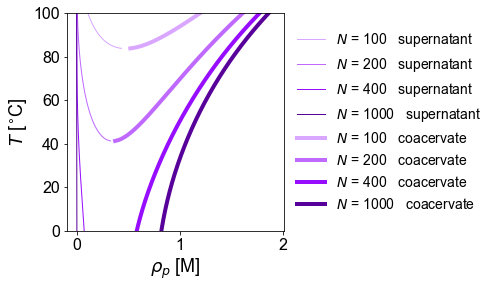

In [3]:
color_list = ['#D9A7FF', '#BF69FF', '#970DFF', '#58009A']# fainter, ['#D1A7FF', '#B080E4', '#772BCB', '#451975']

ax = plot.binodal_vary_N(data_vary_N, N_list, color_list, T_cels=T_cels)

### Old Data ($N \le 150$)

In [12]:
N_list = [25, 40, 50, 100, 150]
data_dict = {}
data_folder = 'salt/no_vdw/'

for N in N_list:
    data_dict[N] = salt.load_data(data_folder, N=N)

Loading data for lB = 3.150 failed.
Loading data for lB = 3.200 failed.
Loading data for lB = 3.250 failed.


C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



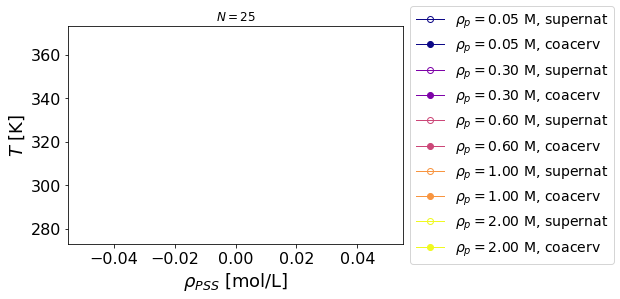

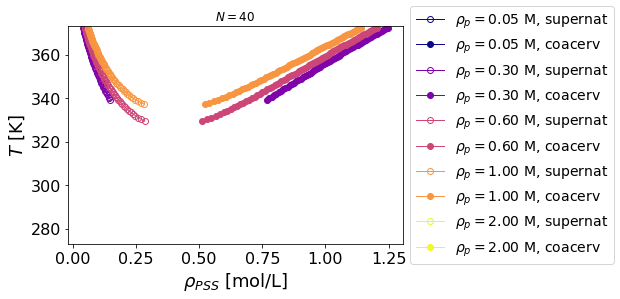

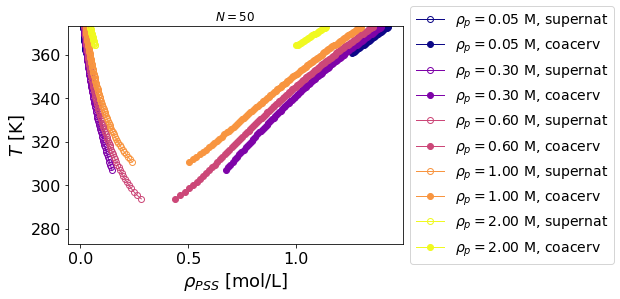

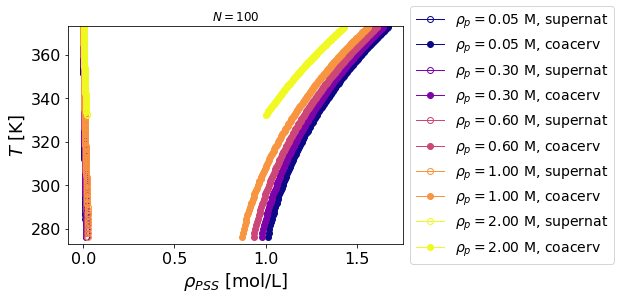

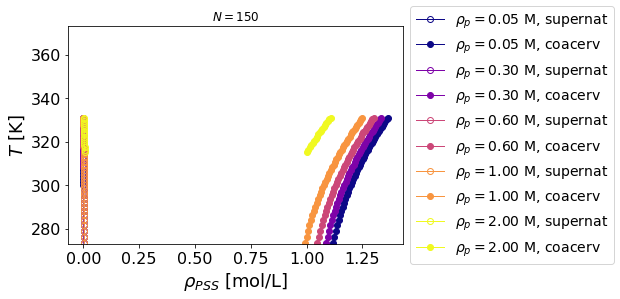

In [13]:
# sets total concentrations [M]
rho_p_list = [0.05, 0.3, 0.6, 1.0, 2.0]

rho_s = 1.59

for N in N_list:
    data = data_dict[N]
    ax = plot.binodal_vary_rho(data, rho_p_list, rho_s, 'p', beads_2_M)
    ax.set_title(r'$N = $' + '{0:d}'.format(N))

## Vary f

In [4]:
data_folder = 'salt/vary_params/'
mu_salt_folder = 'salt/mu_salt_1000/'
rho_s_M = 1.4
f_list = [0.9, 0.95, 1]
sigma = 4.3E-10 # [m]
ext = 'output.dat'
T_cels = True

data_vary_f = salt.binodal_vary_f_data(data_folder, mu_salt_folder, rho_s_M, f_list, sigma=sigma, ext=ext, T_cels=T_cels)

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



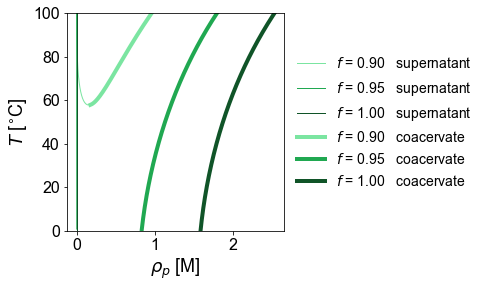

In [5]:
color_list = ['#7BE5A1', '#20A851', '#105428']

ax = plot.binodal_vary_f(data_vary_f, f_list, color_list, T_cels=T_cels)

## Vary sigma

In [2]:
data_folder = 'salt/vary_params/'
mu_salt_folder = 'salt/mu_salt_1000/'
rho_s_M = 1.2
sigma_list = [4E-10, 4.3E-10, 4.6E-10, 4.9E-10]
ext = 'output.dat'
T_cels = True

data_vary_sigma = salt.binodal_vary_sigma_data(data_folder, mu_salt_folder, rho_s_M, sigma_list, ext=ext, T_cels=T_cels)

Could not walk through files in salt/mu_salt_1000\NA(1000)NB(1000)lB(2.109)f(1.000)
Could not walk through files in salt/mu_salt_1000\NA(1000)NB(1000)lB(2.109)f(1.000)


C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.



Could not walk through files in salt/mu_salt_1000\NA(1000)NB(1000)lB(2.109)f(1.000)
Could not walk through files in salt/mu_salt_1000\NA(1000)NB(1000)lB(2.109)f(1.000)
Could not walk through files in salt/mu_salt_1000\NA(1000)NB(1000)lB(2.109)f(1.000)
Could not walk through files in salt/mu_salt_1000\NA(1000)NB(1000)lB(2.109)f(1.000)
Could not walk through files in salt/mu_salt_1000\NA(1000)NB(1000)lB(2.109)f(1.000)
Could not walk through files in salt/mu_salt_1000\NA(1000)NB(1000)lB(2.109)f(1.000)


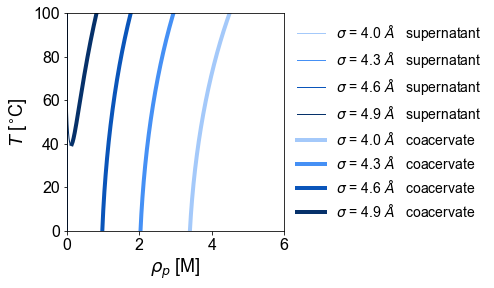

In [4]:
color_list = ['#A4C9FA', '#4590F5', '#0A55BA', '#06316A']
x_lim = [0, 6]

ax = plot.binodal_vary_sigma(data_vary_sigma, sigma_list, color_list, T_cels=T_cels, x_lim=x_lim)

## UCST and LCST -- skip for now

In [3]:
reload(salt)
### DATA PARAMETERS ###
# folder with binodal data
data_folder = 'salt/chi_chris_miscommunication/' # must contain mu in .PD file
# concentration of salt in reservoir [mol/L]
rho_salt_M = 1.8
# converts to beads/sigma^3
rho_salt = rho_salt_M/beads_2_M
# folder with chemical potential calculations for salt solution
mu_salt_folder = 'salt/mu_salt_1000/'
### FORMATTING PARAMETERS ###
# number of points to have in plot
n_pts = 10000
save_name = 'fig1_lcst_fixed_salt_conc.pdf'
# parameter to plot for z axis
z_name = 'T [C]'
# binodal at fixed temperature
z_rough = 30
# range of Bjerrum lengths to plot
lB_lo = 1.62
lB_hi = 2.22
# fixed composition [M]
rho_s = 1.7
rho_p = 0.9
# index for critical point
i_cp = -2 # last line has some junk?
# fixed coordinates defining outlines of binodal surface
T_for_outline = [0, 101]
rho_s_for_outline = [0]

quiet = True

# adjusts for different formatting of Chris's code's output from Pengfei's
naming_structure = 'NA(1000)NB(1000)lB(*)f(1.000)'
ext = 'output.dat'

In [4]:
# loads data
data = salt.load_data(data_folder, ext=ext,
                lB_lo=lB_lo, lB_hi=lB_hi, naming_structure=naming_structure)

In [5]:
# computes data
data_3d, data_mu, data_z, \
data_cp, = salt.data_fig1(data, mu_salt_folder, rho_salt, T_range, 
                                                    sigma, z_name, beads_2_M, n_pts, z_rough, 
                                                   lB_lo=lB_lo, lB_hi=lB_hi,
                                                     ext=ext, naming_structure=naming_structure, i_cp=i_cp, 
                                                   quiet=quiet)

In [9]:
################### PLOT ###################################
# parameters
fs = 14 # tick label font size
op = 0.012
ms_bin = 15
lw_bin = 30
lw_fix = 45
lw_crit = 30
lw_outline = 6

# colors
c1_T = 'blue'
c2_T = 'red'
c1_fix = 'blue'
c2_fix = 'red'
c_crit = 'black'
c_outline = '#1A2D4A'
mode = 'markers'
# figure size
width = 6000 # pixels
height = 5000 # pixels
# indicates which indices of Bjerrum lengths to skip
skip = []

# coordinates of camera eye
eye_xyz = (1.5, 1.5, 1.5)

# offset of axes from true 0 (so they are not hidden by planes in background)
offset = 0.003

# Sets vertical axis limits
x_range = [-0.1, 5.3]
y_range = [0, 2.3]
z_range = [0, 101]

plot_params = (x_range, y_range, z_range, eye_xyz, op, ms_bin, lw_bin, lw_fix, lw_crit, 
               lw_outline, c1_T, c2_T, c1_fix, c2_fix, c_crit, c_outline,
               mode, width, height, fs, offset)

############### PLOTTING ########################
fig = plot.fig1(data_3d, data_cp, data_z, data_mu, plot_params, 
                fixed_T=False, skip=skip)

save_name = 'figs5_ucst_lcst_fixed_salt.pdf'

# # shows figure
# fig.show()

# saves figure
pio.write_image(fig, save_folder + save_name, width=width, height=height)

**The chi parameter was not properly selected due to a miscommunication.** I suggested using a chi parameter of -20, but I actually meant the square-well depth. Below, Chris has provided simulations labeled by the true chi parameter (not the square-well depth).

### UCST-LCST with True Chi Parameter

In [6]:
reload(salt)
### DATA PARAMETERS ###
# folder with binodal data
data_folder = 'salt/chi_chris/' # must contain mu in .PD file
# concentration of salt in reservoir [mol/L]
rho_salt_M = 3.05
# converts to beads/sigma^3
rho_salt = rho_salt_M/beads_2_M
# folder with chemical potential calculations for salt solution
mu_salt_folder = 'salt/mu_salt_1000/'
### FORMATTING PARAMETERS ###
# number of points to have in plot
n_pts = 100000
# parameter to plot for z axis
z_name = 'T [C]'
# binodal at fixed temperature
z_rough = 30
# range of Bjerrum lengths to plot
lB_lo = 1.62
lB_hi = 2.22
# fixed composition [M]
# rho_s = 1.7
# rho_p = 0.9
# index for critical point
i_cp = -2 # last line has some junk?
# fixed coordinates defining outlines of binodal surface
T_for_outline = [0, 101]
rho_s_for_outline = []
chi = -160

quiet = False

# adjusts for different formatting of Chris's code's output from Pengfei's
naming_structure = 'NA(1000)NB(1000)lB(*)f(1.000)chi({0:d}.000)'.format(chi)
mu_naming_structure = 'NA(1000)NB(1000)lB(*)f(1.000)'
ext = 'output.dat'

In [3]:
# loads data--can skip if already loaded
data = salt.load_data(data_folder, ext=ext,
                lB_lo=lB_lo, lB_hi=lB_hi, naming_structure=naming_structure)

In [7]:
# computes data
data_3d, data_mu, data_z, \
data_cp, data_outlines = salt.data_fig1(data, mu_salt_folder, rho_salt, T_range, 
                                                    sigma, z_name, beads_2_M, n_pts, z_rough, 
                                                   lB_lo=lB_lo, lB_hi=lB_hi,
                                                     ext=ext, naming_structure=naming_structure, i_cp=i_cp, 
                                                   quiet=quiet, mu_naming_structure=mu_naming_structure,
                                       T_for_outline=T_for_outline, rho_s_for_outline=rho_s_for_outline)

Could not walk through files in salt/mu_salt_1000\NA(1000)NB(1000)lB(2.109)f(1.000)
Could not walk through files in salt/mu_salt_1000\NA(1000)NB(1000)lB(2.109)f(1.000)
Chemical potential = -0.976 outside of range for Bjerrum length = 1.744.
Chemical potential = -0.977 outside of range for Bjerrum length = 1.746.
Chemical potential = -0.978 outside of range for Bjerrum length = 1.748.
Chemical potential = -0.979 outside of range for Bjerrum length = 1.750.
Chemical potential = -0.980 outside of range for Bjerrum length = 1.752.
Chemical potential = -0.981 outside of range for Bjerrum length = 1.754.
Chemical potential = -0.982 outside of range for Bjerrum length = 1.756.
Chemical potential = -0.983 outside of range for Bjerrum length = 1.758.
Chemical potential = -0.984 outside of range for Bjerrum length = 1.760.
Chemical potential = -0.985 outside of range for Bjerrum length = 1.762.
Chemical potential = -0.986 outside of range for Bjerrum length = 1.764.
Chemical potential = -0.987 o

Chemical potential = -0.976 outside of range for Bjerrum length = 1.744.
Chemical potential = -0.977 outside of range for Bjerrum length = 1.746.
Chemical potential = -0.978 outside of range for Bjerrum length = 1.748.
Chemical potential = -0.979 outside of range for Bjerrum length = 1.750.
Chemical potential = -0.980 outside of range for Bjerrum length = 1.752.
Chemical potential = -0.981 outside of range for Bjerrum length = 1.754.
Chemical potential = -0.982 outside of range for Bjerrum length = 1.756.
Chemical potential = -0.983 outside of range for Bjerrum length = 1.758.
Chemical potential = -0.984 outside of range for Bjerrum length = 1.760.
Chemical potential = -0.985 outside of range for Bjerrum length = 1.762.
Chemical potential = -0.986 outside of range for Bjerrum length = 1.764.
Chemical potential = -0.987 outside of range for Bjerrum length = 1.766.
Chemical potential = -0.988 outside of range for Bjerrum length = 1.768.
Chemical potential = -0.989 outside of range for Bj

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



In [13]:
################### PLOT ###################################
# parameters
fs = 14 # tick label font size
op = 0.005
ms_bin = 15
lw_bin = 30
lw_fix = 45
lw_crit = 30
lw_outline = 6

# colors
c1_T = 'blue'
c2_T = 'red'
c1_fix = 'blue'
c2_fix = 'red'
c_crit = 'black'
c_outline = '#1A2D4A'
mode = 'markers'
# figure size
width = 6000 # pixels
height = 5000 # pixels
# indicates which indices of Bjerrum lengths to skip
skip = []

# coordinates of camera eye
eye_xyz = (1.5, 1.5, 1.5)

# offset of axes from true 0 (so they are not hidden by planes in background)
offset = 0.003

# Sets vertical axis limits
x_range = [-0.1, 6]
y_range = [0, 3.5]
z_range = [0, 104]

plot_params = (x_range, y_range, z_range, eye_xyz, op, ms_bin, lw_bin, lw_fix, lw_crit, 
               lw_outline, c1_T, c2_T, c1_fix, c2_fix, c_crit, c_outline,
               mode, width, height, fs, offset)

############### PLOTTING ########################
fig = plot.fig1(data_3d, data_cp, data_z, data_mu, plot_params, 
                fixed_T=False, skip=skip, data_outlines=data_outlines, has_ucst=True)

save_name = 'figs5_ucst_lcst_fixed_salt_chi_{0:d}.pdf'.format(chi)

# # shows figure
# fig.show()

# saves figure
pio.write_image(fig, save_folder + save_name, width=width, height=height)

I saved one plot at $\chi = 0$ as `figs5_ucst_lcst_fixed_salt_chi_0.pdf` to compare with `fig1_lcst_fixed_salt_fixed_comp.pdf`, which was plotted under the same conditions, just having no $\chi$ parameter rather than a $\chi$ parameter of 0.